<p style = "font-size : 42px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 7px 7px;"><strong>EDA & Predict Prices of Airline Tickets</strong></p>

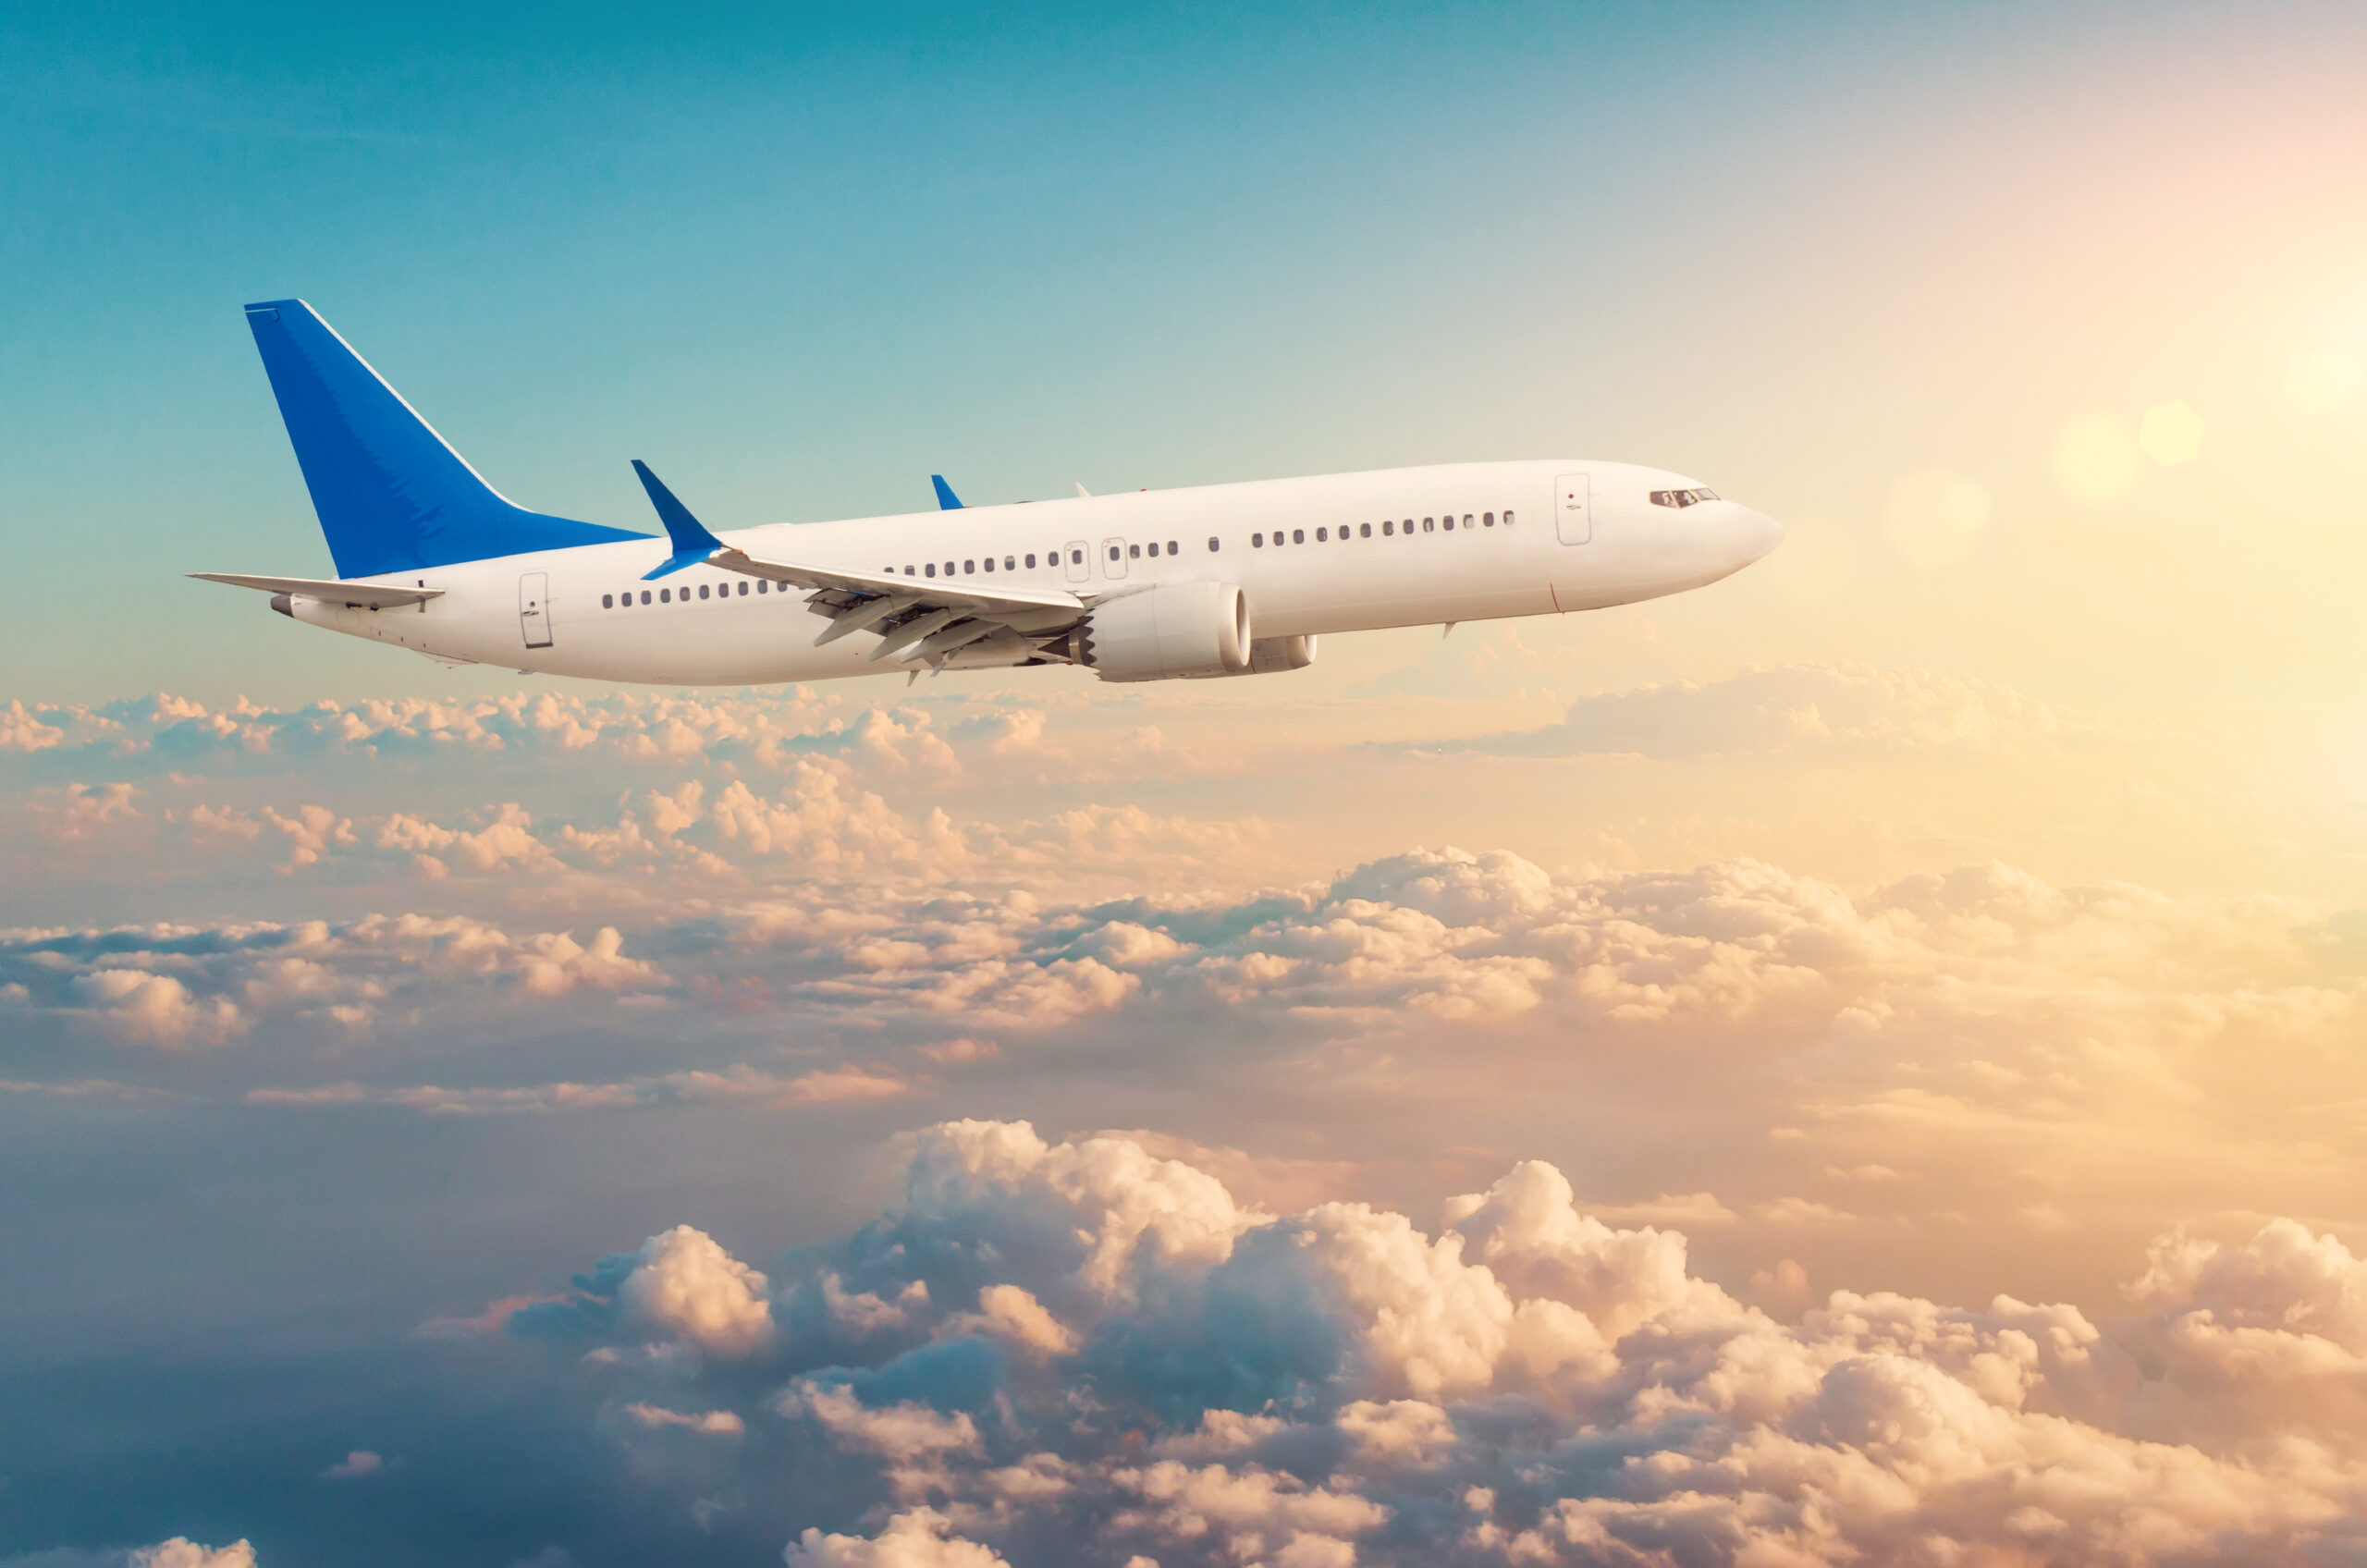

<a id = '0.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 


* [Importing libraries](#2.0)
* [Importing dataset](#4.0)
* [Checking for null values](#3.0)
* [EDA](#1.0)
* [Extract Numerical & Categorical Features?](#5.0)
* [Handling Categorical Data](#6.0)
* [Separate your independent & dependent data](#8.0)
* [Defining function For ML models](#10.0)
    * [Linear Regression Algorithm](#13.0)
    * [Lasso Algorithm](#15.0)
    * [Ridge Algorithm](#16.0)
    * [Decision Tree Algorithm](#11.0)
    * [Random Forest Algorithm](#12.0)




<a id = '2.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Importing libraries</strong></p>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso  ,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None)

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Importing dataset </strong></p>

In [3]:
data = pd.read_csv('Data_Train.csv')

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA) : </strong></p>


<p style = "font-size : 35px; color : #22668D ; font-family : 'Comic Sans MS'; text-align : center; background-color : #8ECDDD; border-radius: 5px 5px;"><strong>head() - shape - info() - describe() - dtypes </strong></p>

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.shape

(10683, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL ? BOM ? COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,No info,8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id = '3.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Checking for null values</strong></p>

In [9]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(10682, 11)

<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
    <h1 style = "font-family : 'Comic Sans MS';" >We can see that Date_of_Journey is a object data type:</h1>
   
* Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
* model will not be able to understand Theses string values,it just understand Time-stamp
    For this we require pandas to_datetime to convert object data type to datetime dtype.

- dt.day method will extract only day of that date
- dt.month method will extract only month of that date
    
</div>


In [12]:
data.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [13]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    data[i] = pd.to_datetime(data[i])

In [14]:
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2024-09-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2024-09-18 05:50:00,2024-09-18 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2024-09-18 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,2024-09-18 18:05:00,2024-09-18 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,2024-09-18 16:50:00,2024-09-18 21:35:00,4h 45m,1 stop,No info,13302
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU ? BLR,2024-09-18 09:00:00,2024-09-18 11:25:00,2h 25m,non-stop,No info,3873
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR ? BOM ? DEL,2024-09-18 18:55:00,2024-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR ? BOM ? DEL,2024-09-18 08:00:00,2024-03-02 05:05:00,21h 5m,1 stop,No info,22270
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR ? BOM ? DEL,2024-09-18 08:55:00,2024-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL ? BOM ? COK,2024-09-18 11:25:00,2024-09-18 19:15:00,7h 50m,1 stop,No info,8625


In [15]:
data['JourneyDay'] = data.Date_of_Journey.dt.day
data['JourneyMonth'] = data.Date_of_Journey.dt.month

In [16]:
data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,JourneyDay,JourneyMonth
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2024-09-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2024-09-18 05:50:00,2024-09-18 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2024-09-18 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,2024-09-18 18:05:00,2024-09-18 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,2024-09-18 16:50:00,2024-09-18 21:35:00,4h 45m,1 stop,No info,13302,3,1
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU ? BLR,2024-09-18 09:00:00,2024-09-18 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR ? BOM ? DEL,2024-09-18 18:55:00,2024-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR ? BOM ? DEL,2024-09-18 08:00:00,2024-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR ? BOM ? DEL,2024-09-18 08:55:00,2024-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL ? BOM ? COK,2024-09-18 11:25:00,2024-09-18 19:15:00,7h 50m,1 stop,No info,8625,27,5


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
    
</div>


In [17]:
data.drop('Date_of_Journey', axis = 1, inplace=True)

In [18]:
data.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,JourneyDay,JourneyMonth
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2024-09-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2024-09-18 05:50:00,2024-09-18 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2024-09-18 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2024-09-18 18:05:00,2024-09-18 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2024-09-18 16:50:00,2024-09-18 21:35:00,4h 45m,1 stop,No info,13302,3,1
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,2024-09-18 09:00:00,2024-09-18 11:25:00,2h 25m,non-stop,No info,3873,24,6
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,2024-09-18 18:55:00,2024-03-13 10:25:00,15h 30m,1 stop,In-flight meal not included,11087,3,12
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,2024-09-18 08:00:00,2024-03-02 05:05:00,21h 5m,1 stop,No info,22270,3,1
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,2024-09-18 08:55:00,2024-03-13 10:25:00,25h 30m,1 stop,In-flight meal not included,11087,3,12
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,2024-09-18 11:25:00,2024-09-18 19:15:00,7h 50m,1 stop,No info,8625,27,5


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* Defining functions extract values from [`Dep_Time` , `Arrival_Time`] columns and drop any column
    
</div>


In [19]:
def extract_hour(data, col):
    data[col+'_hour'] = data[col].dt.hour
    
def extract_min(data, col):
    data[col+'_minute'] = data[col].dt.minute

def drop_column(data, col):
    data.drop(col, axis=1, inplace=True)

In [20]:
extract_hour(data, 'Dep_Time')
extract_min(data, 'Dep_Time')
drop_column(data, 'Dep_Time')

In [21]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,JourneyDay,JourneyMonth,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2024-09-18 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2024-09-18 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2024-09-18 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [22]:
extract_hour(data, 'Arrival_Time')
extract_min(data, 'Arrival_Time')
drop_column(data, 'Arrival_Time')

In [23]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,JourneyDay,JourneyMonth,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* Apply pre-processing on duration column,Separate Duration hours and minute from `duration` column
    
</div>


In [24]:
data.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [25]:
duration = list(data.Duration)

for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

In [26]:
data.Duration = duration

In [27]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,JourneyDay,JourneyMonth,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [28]:
DurationHour = []
DurationMinute = []

for i in range(len(duration)):
    DurationHour.append(duration[i].split(' ')[0][0:-1])
    DurationMinute.append(duration[i].split(' ')[1][0:-1])
DurationHour, DurationMinute

(['2',
  '7',
  '19',
  '5',
  '4',
  '2',
  '15',
  '21',
  '25',
  '7',
  '13',
  '2',
  '2',
  '12',
  '2',
  '26',
  '4',
  '22',
  '23',
  '20',
  '5',
  '15',
  '2',
  '2',
  '13',
  '15',
  '5',
  '5',
  '2',
  '2',
  '2',
  '13',
  '2',
  '22',
  '5',
  '10',
  '5',
  '2',
  '6',
  '11',
  '11',
  '8',
  '22',
  '2',
  '12',
  '2',
  '2',
  '2',
  '16',
  '19',
  '3',
  '25',
  '2',
  '3',
  '2',
  '16',
  '15',
  '2',
  '6',
  '25',
  '12',
  '27',
  '10',
  '10',
  '2',
  '10',
  '2',
  '1',
  '13',
  '2',
  '1',
  '26',
  '7',
  '13',
  '5',
  '2',
  '2',
  '1',
  '19',
  '2',
  '14',
  '2',
  '22',
  '9',
  '10',
  '21',
  '5',
  '18',
  '12',
  '18',
  '9',
  '11',
  '17',
  '13',
  '2',
  '2',
  '2',
  '3',
  '1',
  '16',
  '12',
  '12',
  '7',
  '24',
  '2',
  '8',
  '7',
  '14',
  '30',
  '19',
  '15',
  '2',
  '12',
  '10',
  '5',
  '15',
  '16',
  '10',
  '2',
  '11',
  '2',
  '1',
  '14',
  '20',
  '2',
  '23',
  '18',
  '16',
  '2',
  '2',
  '8',
  '16',
  '3',
  '2

In [29]:
data['DurationHour'] = DurationHour
data['DurationMinute'] = DurationMinute

In [30]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,JourneyDay,JourneyMonth,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,DurationHour,DurationMinute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [31]:
data.drop('Duration', axis=1, inplace=True)

In [32]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,JourneyDay,JourneyMonth,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,DurationHour,DurationMinute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [33]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
JourneyDay              int64
JourneyMonth            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
DurationHour           object
DurationMinute         object
dtype: object

In [34]:
data.DurationHour = data.DurationHour.astype(int)
data.DurationMinute = data.DurationMinute.astype(int)

In [35]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
JourneyDay              int64
JourneyMonth            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
DurationHour            int32
DurationMinute          int32
dtype: object

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong> Extract Numerical & Categorical Features</strong></p>   

In [36]:
numericalFeatures = [col for col in data.columns if data[col].dtype != 'O']
numericalFeatures

['Price',
 'JourneyDay',
 'JourneyMonth',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'DurationHour',
 'DurationMinute']

In [37]:
categoricalFeatures = [col for col in data.columns if data[col].dtype == 'O']
categoricalFeatures

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Handling Categorical Data</strong></p>         

<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
    <h1 style = "font-family : 'Comic Sans MS';" >We are using 2 main Encoding Techniques to convert Categorical data into some numerical format:</h1>
   
* Nominal data --> data are not in any order --> OneHotEncoder is used in this case
* Ordinal data --> data are in order -->       LabelEncoder is used in this case
    
</div>


In [38]:
categoricalData = data[categoricalFeatures]
categoricalData.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-success">
   
* Airline vs Price Analysis
    - check value_counts()
    - visualize it 
    - Encode the col
    
</div>


In [39]:
data.Airline.value_counts()
data.Airline.unique()
data.Airline.nunique()

12

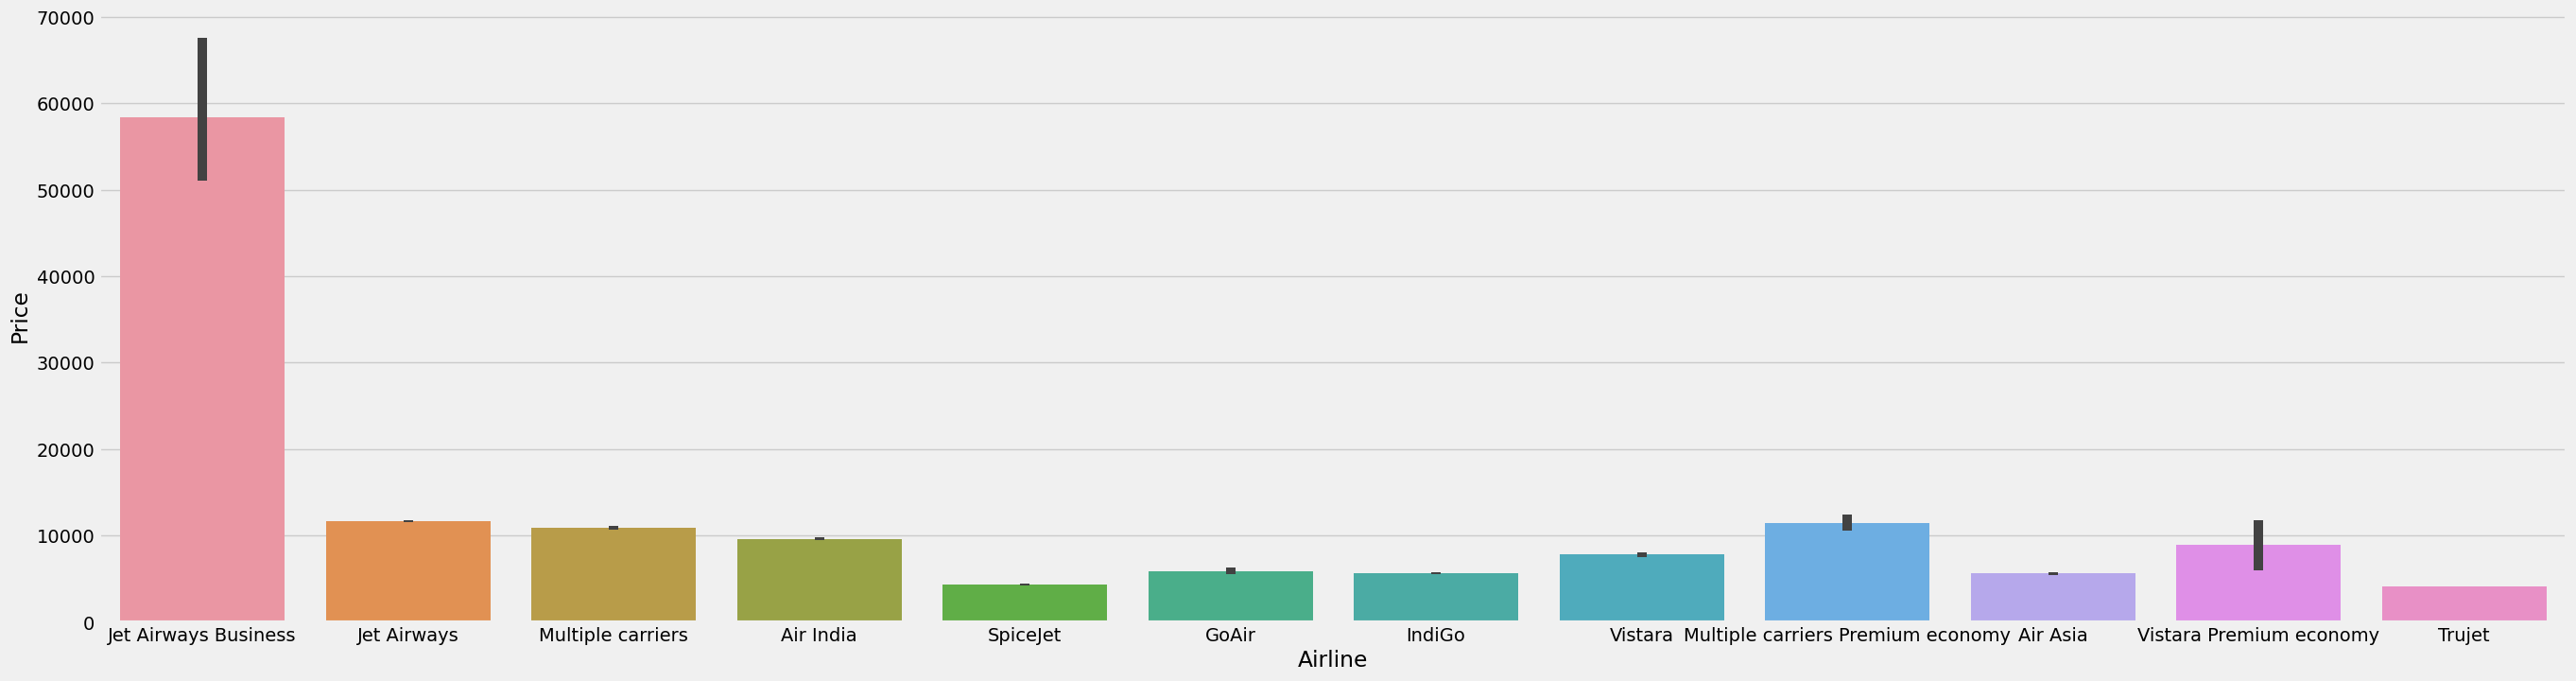

In [40]:
plt.figure(figsize=(30,8))
sns.barplot(y='Price', x='Airline', data=data.sort_values('Price', ascending=False))
plt.show()

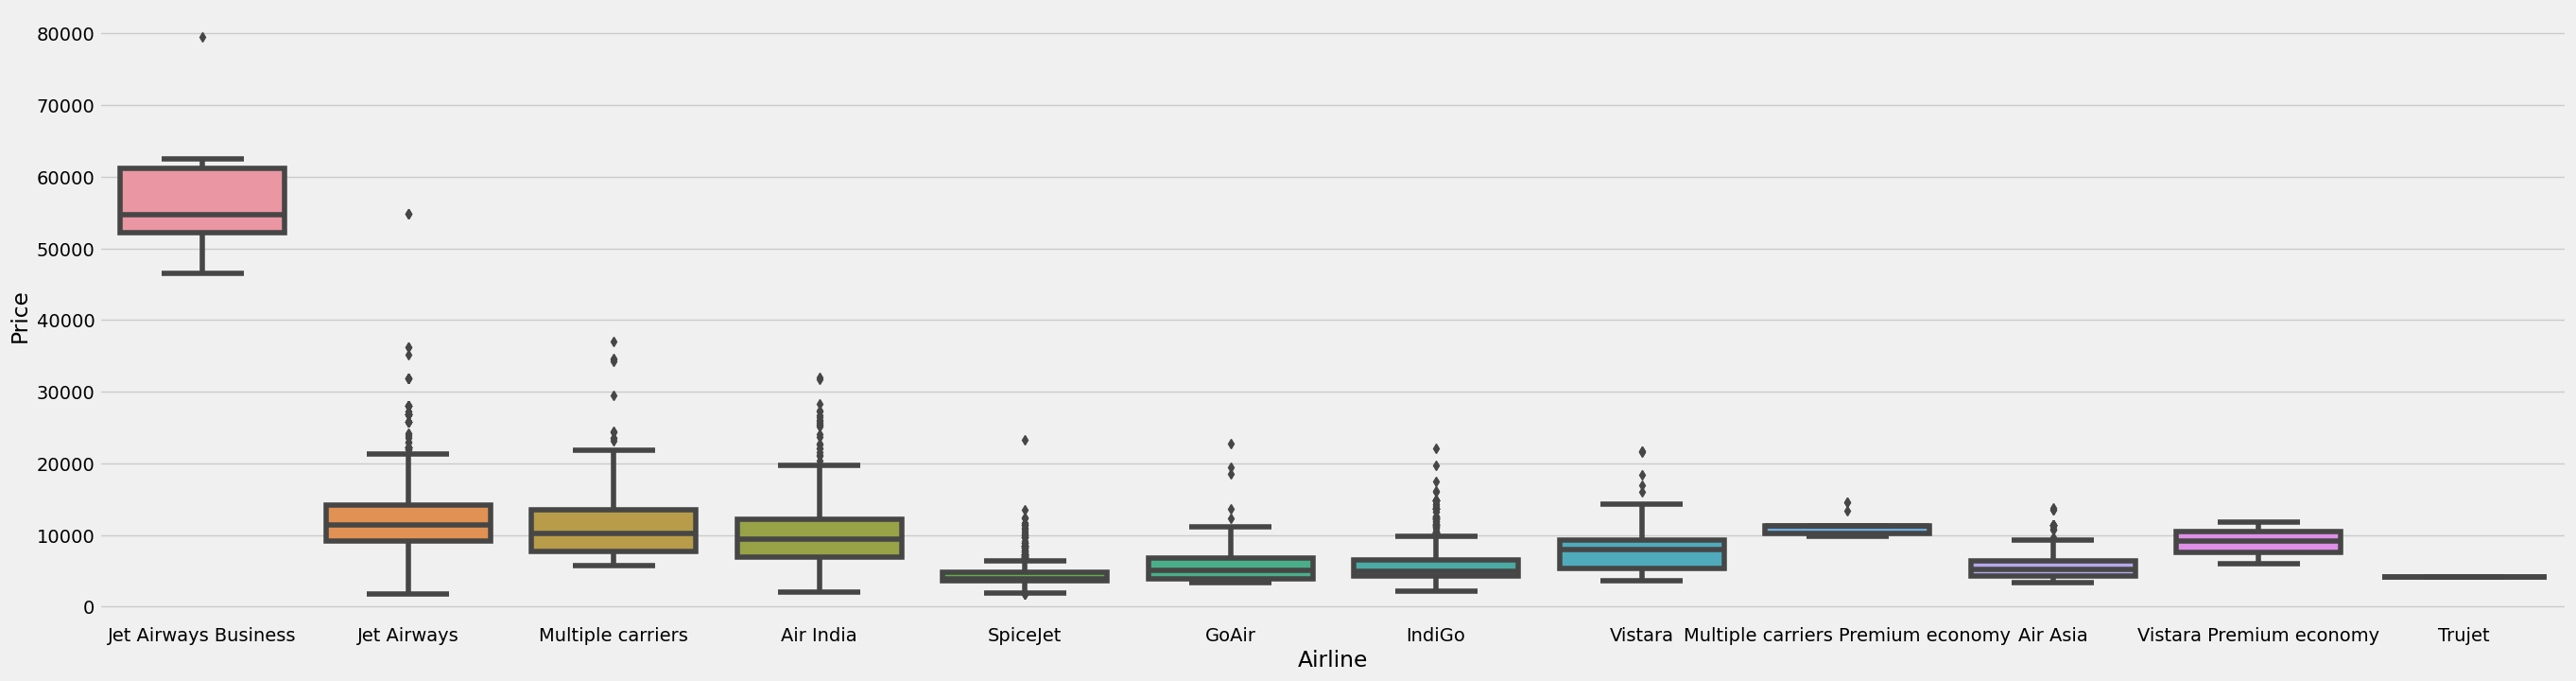

In [41]:
plt.figure(figsize=(30,8))
sns.boxplot(y='Price', x='Airline', data=data.sort_values('Price', ascending=False))
plt.show()

<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median    
</div>


In [42]:
Airline = pd.get_dummies(categoricalData.Airline,drop_first=True ,dtype='int')
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-success">
   
* Source vs Price Analysis
    - check value_counts()
    - visualize it 
    - Encode the col
    
</div>


In [43]:
categoricalData.Source.value_counts()
categoricalData.Source.unique()
categoricalData.Source.nunique()

5

<Axes: xlabel='Source', ylabel='Price'>

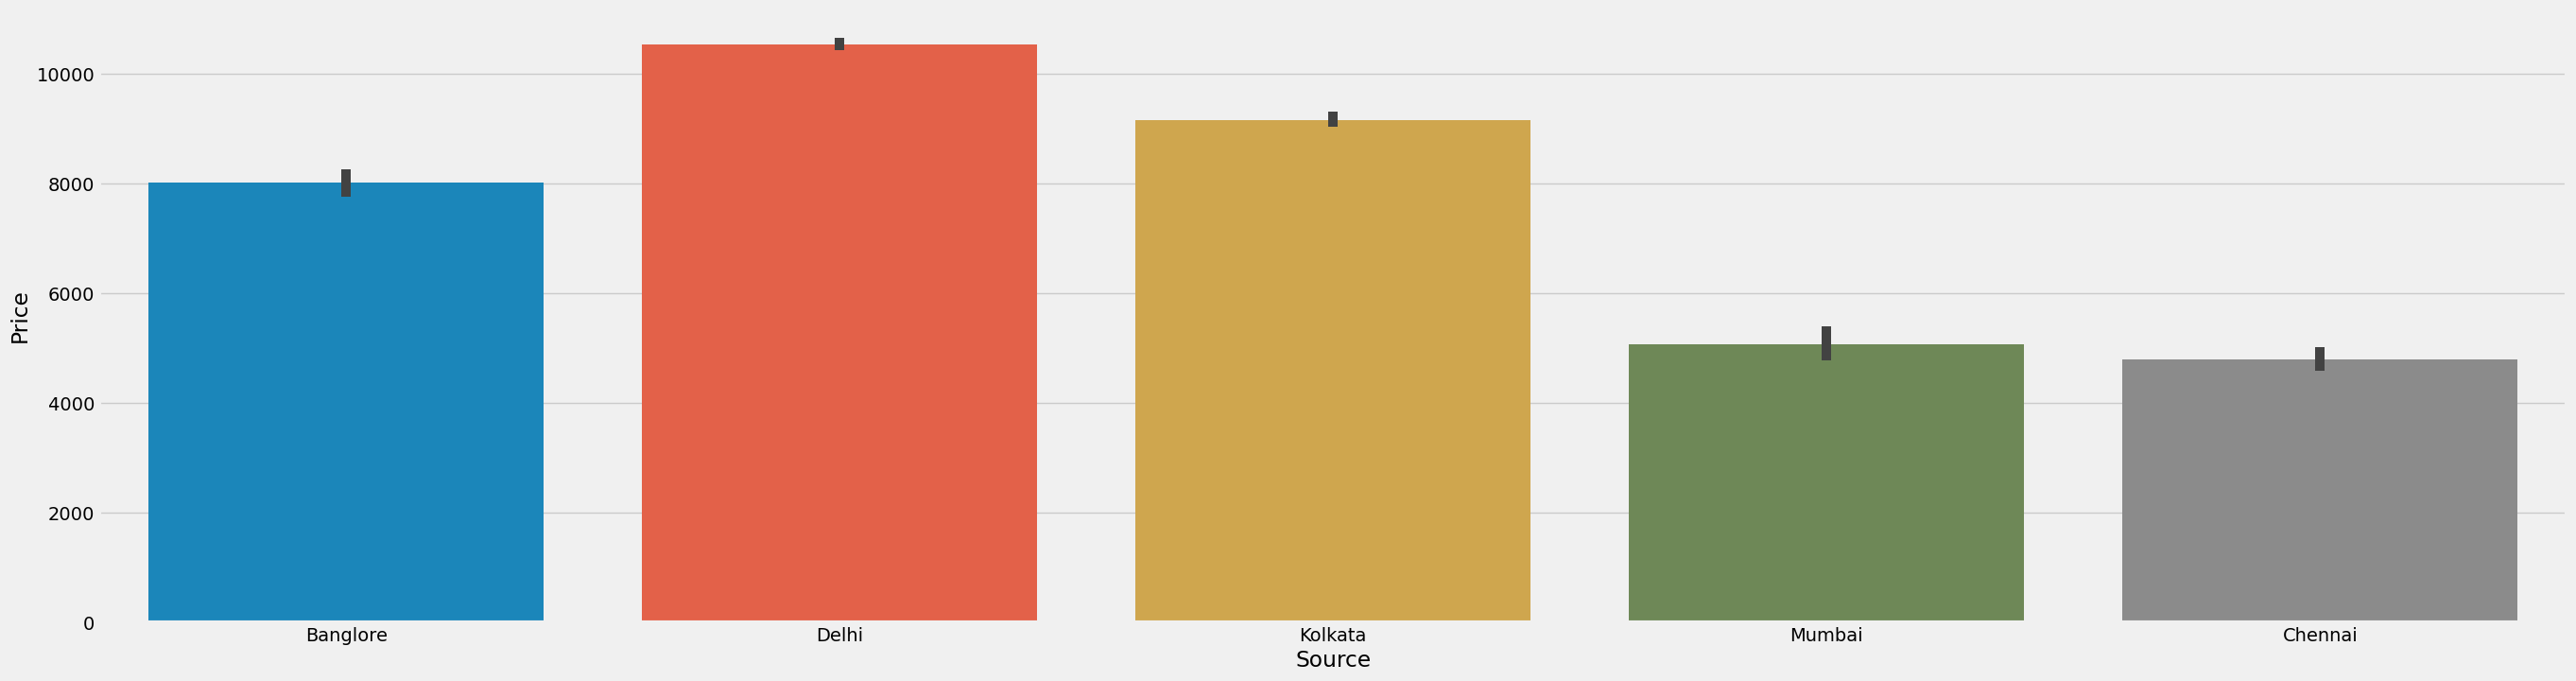

In [44]:
plt.figure(figsize=(30,8))
sns.barplot(y='Price', x='Source', data=data.sort_values('Price', ascending=False))

<Axes: xlabel='Source', ylabel='Price'>

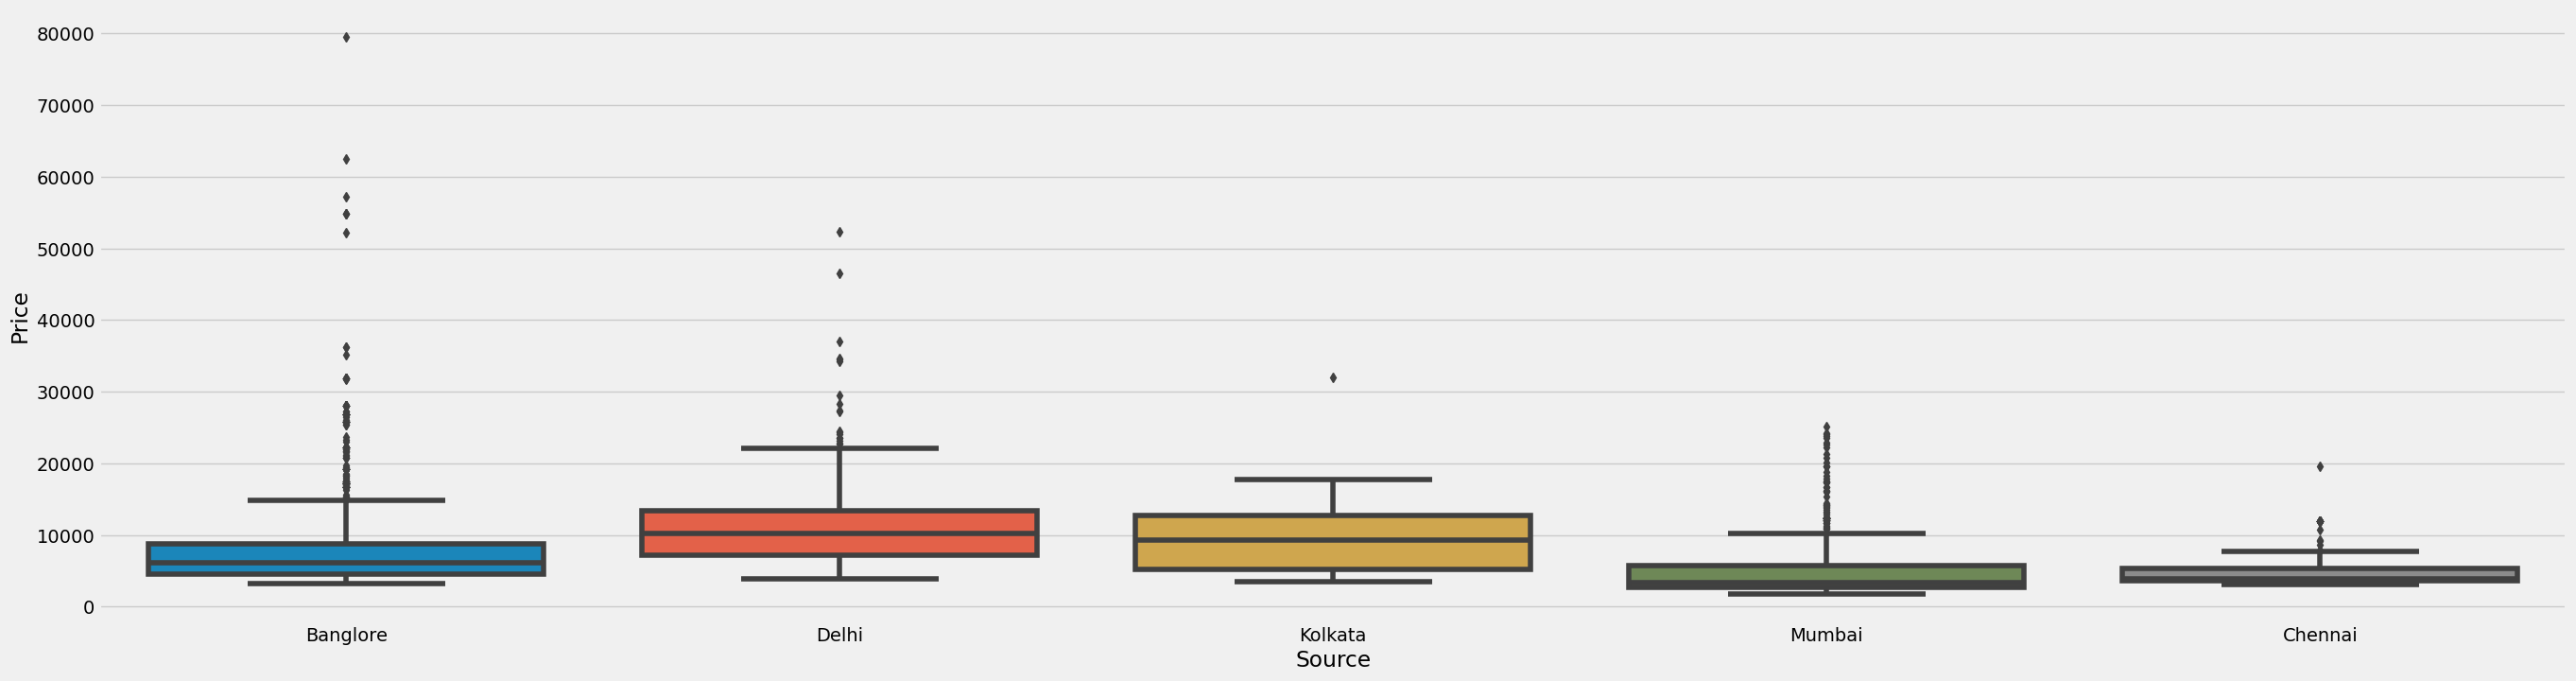

In [45]:
plt.figure(figsize=(30,8))
sns.boxplot(y='Price', x='Source', data=data.sort_values('Price', ascending=False))

In [46]:
Source = pd.get_dummies(categoricalData.Source, drop_first=True, dtype='int')
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-success">
   
* Destination vs Price Analysis
    - check value_counts()
    - visualize it 
    - Encode the col
    
</div>


In [47]:
categoricalData.Destination.value_counts()
categoricalData.Destination.unique()
categoricalData.Destination.nunique()

6

<Axes: xlabel='Destination', ylabel='Price'>

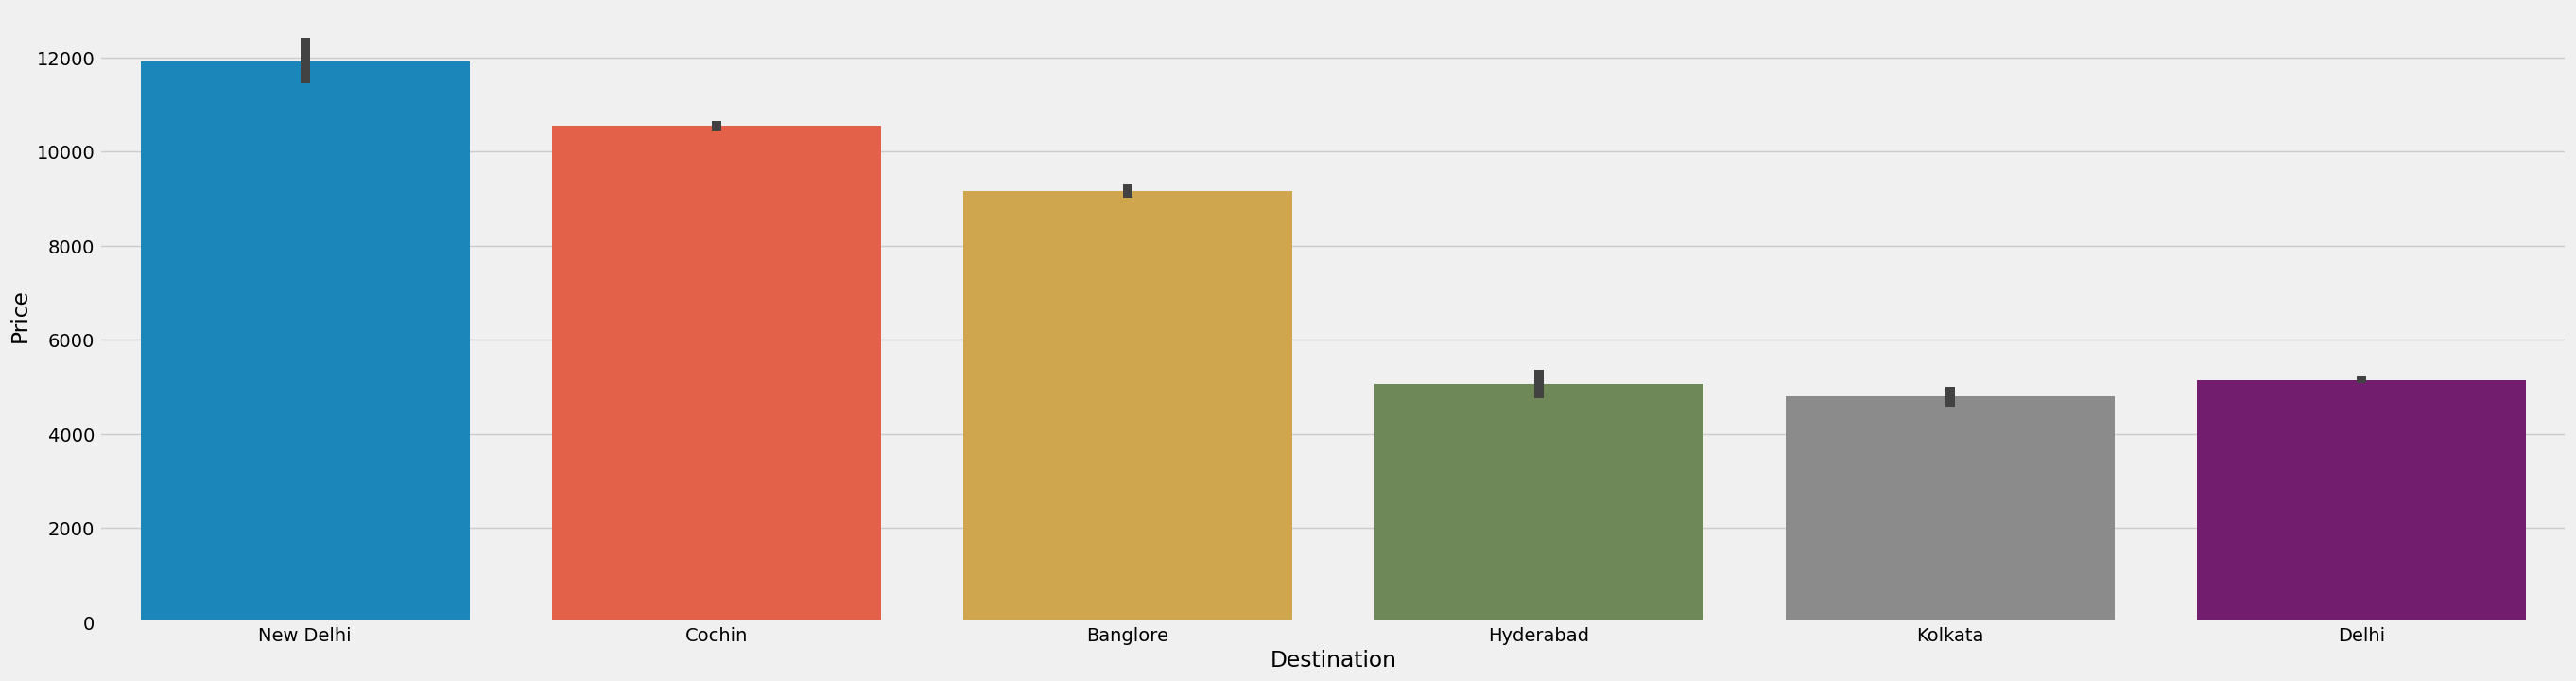

In [48]:
plt.figure(figsize=(30,8))
sns.barplot(y='Price', x='Destination', data= data.sort_values('Price',ascending=False))

In [49]:
Destination = pd.get_dummies(categoricalData.Destination, drop_first=True, dtype='int')

In [50]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-success">
   
* Dealing with Route column
    - check value_counts() , unique , nunique , maximum splits
    - creat new columns for each split
    - creat function to print : how many categories in each cat_feature
    
</div>


In [51]:
categoricalData.Route.value_counts()
categoricalData.Route.unique()
categoricalData.Route.nunique()

128

In [52]:
route = categoricalData['Route'].unique()
print(route[0].split())
print(route[0].split(' ? '))

['BLR', '?', 'DEL']
['BLR', 'DEL']


In [53]:
route_length =[]
for i in route:
    route_length.append(len(i.split(' ? ')))
route_length

[2,
 4,
 4,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 2,
 3,
 4,
 3,
 3,
 2,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 5,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 4,
 5,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 5,
 5,
 4,
 3,
 4,
 5,
 5,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 5,
 4,
 5,
 3,
 4,
 4,
 4,
 5,
 3,
 4,
 5,
 4,
 3,
 3,
 4,
 4,
 4,
 5,
 4,
 6,
 3]

In [54]:
max(route_length)

6

In [55]:
categoricalData['R1'] = categoricalData['Route'].str.split('?').str[0]
categoricalData['R2'] = categoricalData['Route'].str.split('?').str[1]
categoricalData['R3'] = categoricalData['Route'].str.split('?').str[2]
categoricalData['R4'] = categoricalData['Route'].str.split('?').str[3]
categoricalData['R5'] = categoricalData['Route'].str.split('?').str[4]
categoricalData['R6'] = categoricalData['Route'].str.split('?').str[5]

In [56]:
categoricalData.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,R1,R2,R3,R4,R5,R6
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN,NaN


In [57]:
categoricalData['R1'].fillna('None', inplace=True)
categoricalData['R2'].fillna('None', inplace=True)
categoricalData['R3'].fillna('None', inplace=True)
categoricalData['R4'].fillna('None', inplace=True)
categoricalData['R5'].fillna('None', inplace=True)
categoricalData['R6'].fillna('None', inplace=True)

In [58]:
categoricalData.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,R1,R2,R3,R4,R5,R6
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,BLR,NAG,DEL,None,None,None


In [59]:
# now extract how many categories in each cat feature
for feature in categoricalData.columns:
    print(f"{feature} has total {len(categoricalData[feature].value_counts())}")

Airline has total 12
Source has total 5
Destination has total 6
Route has total 128
Total_Stops has total 5
Additional_Info has total 10
R1 has total 5
R2 has total 45
R3 has total 30
R4 has total 14
R5 has total 6
R6 has total 2


In [60]:
encoder =LabelEncoder()

<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* As we will see we have lots of features in Route , one hot encoding will not be a better option lets appply Label Encoding   
</div>


In [61]:
for i in ['R1', "R2", 'R3','R4','R5','R6']:
    categoricalData[i] = encoder.fit_transform(categoricalData[i])

In [62]:
categoricalData.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,R1,R2,R3,R4,R5,R6
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,0,13,29,13,5,1
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,2,25,1,3,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,3,32,4,5,5,1
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,2,34,3,13,5,1
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,0,34,8,13,5,1


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-success">
   
* Additional_Info contains almost 80% no_info,so we can drop this column
* We can drop Route as well as we have pre-process that column
* Encode Total_Stops colum
  
    
</div>


In [63]:
categoricalData.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [64]:
categoricalData.drop('Additional_Info', axis=1, inplace=True)

In [65]:
categoricalData.head()

,Airline,Source,Destination,Route,Total_Stops,R1,R2,R3,R4,R5,R6
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,0,13,29,13,5,1
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,2,25,1,3,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,3,32,4,5,5,1
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,2,34,3,13,5,1
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,0,34,8,13,5,1


In [66]:
categoricalData.drop('Route', axis=1, inplace=True)

In [67]:
categoricalData.head()

,Airline,Source,Destination,Total_Stops,R1,R2,R3,R4,R5,R6
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5,1
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5,1
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5,1
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5,1
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5,1


In [68]:
categoricalData.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [69]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* As this is case of Ordinal Categorical type we perform LabelEncoder 
</div>


In [70]:
categoricalData['Total_Stops'] = categoricalData['Total_Stops'].map(dict)

In [71]:
categoricalData.head()

,Airline,Source,Destination,Total_Stops,R1,R2,R3,R4,R5,R6
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,1
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,1
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,1
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,1


In [72]:
categoricalData.drop(columns=['Airline','Source','Destination'], axis=1, inplace=True)

<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-success">
   
* Concatenate dataframes --> categorical + Airline + Source + Destination + data[num_features]
* and Drop columns --> Airline , Source , Destination 
  
    
</div>


In [73]:
categoricalData.head()

,Total_Stops,R1,R2,R3,R4,R5,R6
0,0,0,13,29,13,5,1
1,2,2,25,1,3,5,1
2,2,3,32,4,5,5,1
3,1,2,34,3,13,5,1
4,1,0,34,8,13,5,1


In [76]:
data = pd.concat([categoricalData, Airline, Source, Destination, data[numericalFeatures]], axis=1)

In [77]:
data.head()

,Total_Stops,R1,R2,R3,R4,R5,R6,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,JourneyDay,JourneyMonth,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,DurationHour,DurationMinute
0,0,0,13,29,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [78]:
data.shape

(10682, 36)

In [79]:
data.columns

Index(['Total_Stops', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Price',
       'JourneyDay', 'JourneyMonth', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'DurationHour',
       'DurationMinute'],
      dtype='object')

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Separate your independent (X) & dependent (Y) data</strong></p> 

In [80]:
x = data.drop('Price', axis=1)
y = data['Price']

<a id = '0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong> Split dataset into train & test </strong></p>

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=44)

In [84]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (7477, 35)
X_test shape is  (3205, 35)
y_train shape is  (7477,)
y_test shape is  (3205,)


<a id = '10.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Defining function For ML models</strong></p> 


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* Create function to train our models and print the accuracy ex:  def predict(ml_model)
</div>


In [97]:
def predict(ml):
    model = ml.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    r2_score = metrics.r2_score(y_test, y_prediction)
    mse = metrics.mean_squared_error(y_test, y_prediction)
    mae = metrics.mean_absolute_error(y_test, y_prediction)
    rmse = np.sqrt(mse)
    
    print(f"Training Score is: {model.score(X_train, y_train)}")
    print('-' * 40)
    print(f"Testing Score is: {model.score(X_test, y_test)}")
    print('-' * 40)
    print(f"Predictions are: {y_prediction}")
    print("-" * 40)
    print(f"R2 Score is: {r2_score}")
    print('-' * 40)
    print(f'MSE is: {mse}')
    print('-' * 40)
    print(f'MAE is: {mae}')
    print('-' * 40)
    print(f"RMSE is: {rmse}")
    print('-' * 40)
    sns.distplot(y_test - y_prediction)

<a id = '13.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Linear Regression Algorithm</strong></p> 


Training Score is: 0.6203718247354066
----------------------------------------
Testing Score is: 0.6437652851822877
----------------------------------------
Predictions are: [ 7561.22343114  9969.66093404 12740.83688143 ...  9678.7150591
 11815.93205813  6326.51777947]
----------------------------------------
R2 Score is: 0.6437652851822877
----------------------------------------
MSE is: 7686957.79527692
----------------------------------------
MAE is: 1976.801129096976
----------------------------------------
RMSE is: 2772.536346971293
----------------------------------------


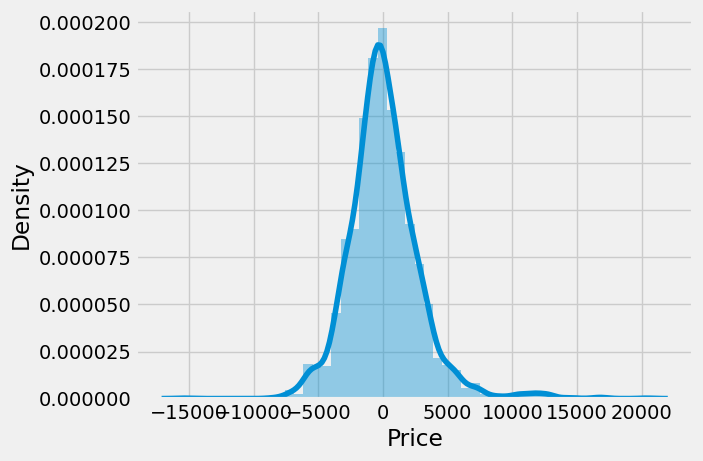

In [98]:
predict(LinearRegression())

<a id = '15.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Lasso Algorithm</strong></p> 

Training Score is: 0.6201765242066384
----------------------------------------
Testing Score is: 0.6441162549415409
----------------------------------------
Predictions are: [ 7571.82943106  9957.56039351 12731.43539075 ...  9686.40184923
 11818.50520173  6323.83997544]
----------------------------------------
R2 Score is: 0.6441162549415409
----------------------------------------
MSE is: 7679384.446542005
----------------------------------------
MAE is: 1975.7707667764764
----------------------------------------
RMSE is: 2771.170230523922
----------------------------------------


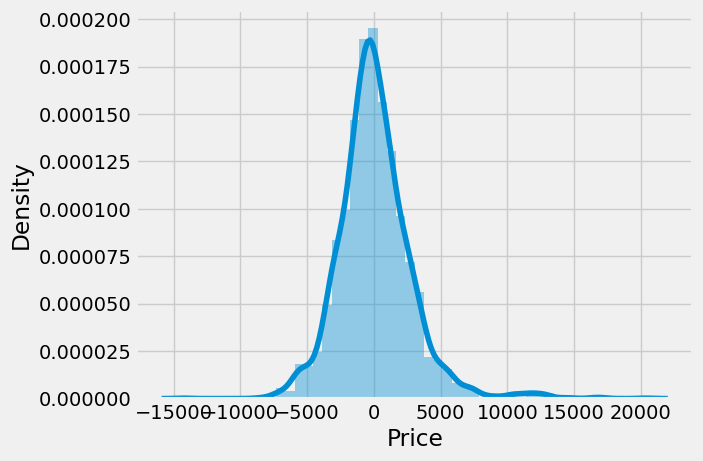

In [99]:
predict(Lasso(max_iter=1000,alpha= 0.5, selection='random'))

<a id = '16.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Ridge Algorithm</strong></p> 

Training Score is: 0.6177449738975813
----------------------------------------
Testing Score is: 0.6433121062671985
----------------------------------------
Predictions are: [ 7568.64171292  9947.61617403 12727.64367618 ...  9681.64697472
 11813.83958227  6311.94336529]
----------------------------------------
R2 Score is: 0.6433121062671985
----------------------------------------
MSE is: 7696736.649074992
----------------------------------------
MAE is: 1980.5154716246736
----------------------------------------
RMSE is: 2774.299307766736
----------------------------------------


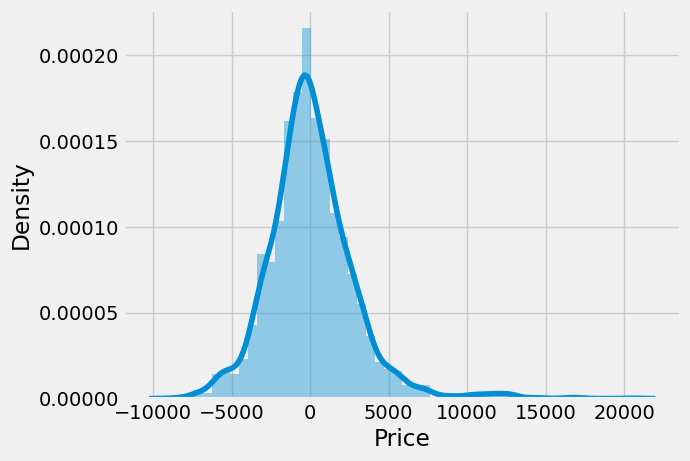

In [100]:
predict(Ridge(max_iter=10000, alpha=0.9))

<a id = '11.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Decision Tree Algorithm</strong></p> 


Training Score is: 0.9254124914870545
----------------------------------------
Testing Score is: 0.7770858539789427
----------------------------------------
Predictions are: [ 5485.          7674.5        10184.55555556 ... 11712.44444444
 14642.5         5422.11111111]
----------------------------------------
R2 Score is: 0.7770858539789427
----------------------------------------
MSE is: 4810119.736115247
----------------------------------------
MAE is: 1221.8562479261075
----------------------------------------
RMSE is: 2193.198517260863
----------------------------------------


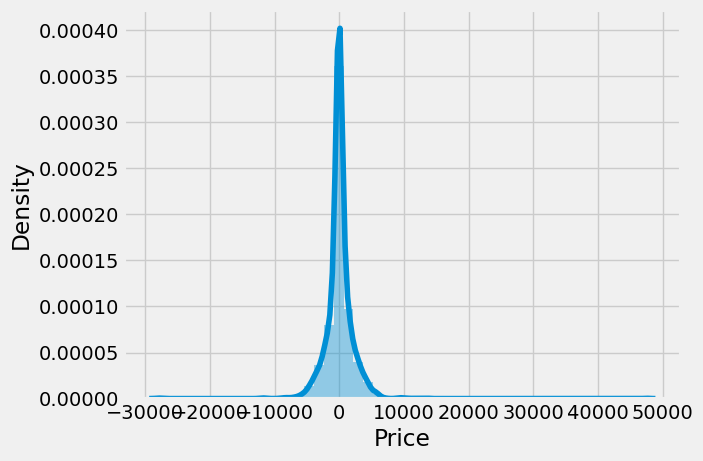

In [101]:
predict(DecisionTreeRegressor(criterion= "squared_error", min_samples_split=10 ,random_state= 5))

<a id = '12.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Random Forest Algorithm</strong></p> 


Training Score is: 0.9564770432803241
----------------------------------------
Testing Score is: 0.8139650998267728
----------------------------------------
Predictions are: [ 6475.90875     8185.78715    11252.97910952 ... 11621.00283333
 12891.49238333  5257.40612381]
----------------------------------------
R2 Score is: 0.8139650998267728
----------------------------------------
MSE is: 4014326.4162559654
----------------------------------------
MAE is: 1161.5004577608306
----------------------------------------
RMSE is: 2003.5784028223018
----------------------------------------


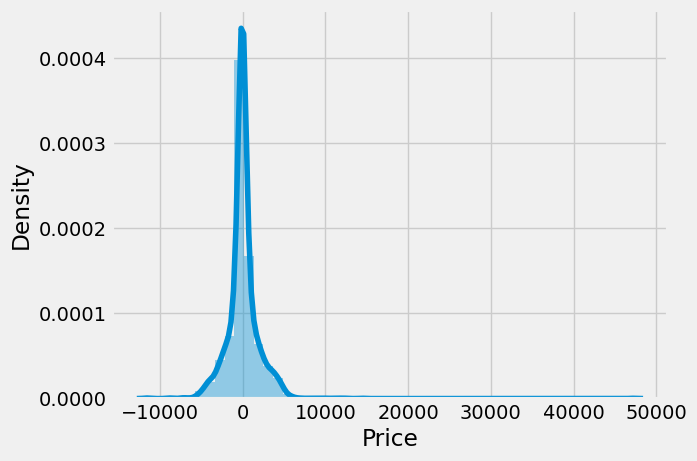

In [102]:
predict(RandomForestRegressor(n_estimators=1000))